# Predicția Statusului Pacientului (Patient Status Prediction)

For this problem, you need to implement a machine learning model to predict the value of the `Status` field using an available dataset containing information about patients. The dataset is organized in a CSV file that includes various features, and the evaluation of the model will be based on the precision for the `Dead` class.

**The dataset contains the following fields, each with its corresponding meaning:**

- `Age`: The patient's age.
- `Race`: The patient's race (e.g., White, Other).
- `Marital Status`: The patient's marital status (Married, Single, Divorced, etc.).
- `T Stage`: Tumor stage, according to the TNM staging system (e.g., T1, T2, T3, T4).
- `N Stage`: Degree of lymph node involvement (N0, N1, etc.).
- `6th Stage`: Cancer stage according to the 6th edition TNM classification.
- `differentiate`: Tumor differentiation grade (Well differentiated, Moderately differentiated, Poorly differentiated).
- `Grade`: Histological grade of the tumor (1, 2, 3, etc.).
- `A Stage`: Disease stage classification (e.g., Regional).
- `Tumor Size`: Tumor size measured in a relevant unit (may contain missing values).
- `BMI`: The patient's body mass index.
- `Heart Rate`: The patient's heart rate.
- `Serum Creatinine`: Serum creatinine level.
- `Uric Acid`: Blood uric acid level.
- `Hemoglobin`: Hemoglobin concentration in the blood.
- `GFR (Glomerular Filtration Rate)`: Glomerular filtration rate, an indicator of kidney function.
- `Serum Sodium`: Serum sodium concentration.
- `Serum Potassium`: Serum potassium concentration.
- `Serum Albumin`: Serum albumin level.
- `Lactate`: Blood lactate concentration.
- `Status`: The patient’s status, with possible values “Dead” or “Alive” (target field for prediction).

## Tasks

For the initial tasks, you will need to load the dataset and perform a series of statistical analyses to better understand the dataset you will be working with.

### Subtask 1 (10 points)

For each patient in the test set, classify kidney function into one of the two categories, based on the `GFR` (Glomerular Filtration Rate) value:

- `Normal` if GFR >= 90
- `Mildly Decreased` if 60 <= GFR < 90

### Subtask 2 (10 points)

Use the training dataset to calculate the quartiles of values in the `Serum Creatinine` column.

Quartiles are statistical thresholds that divide the distribution of values into an equal number of parts:

- **Q1:** value below which 25% of the values fall
- **Q2:** median value (50% below, 50% above)
- **Q3:** value below which 75% of observations fall

Based on these thresholds, determine one of the four risk levels for each patient in the test set:

- `Very Low` – if `Serum Creatinine` <= Q1
- `Low` – if Q1 < `Serum Creatinine` <= Q2
- `High` – if Q2 < `Serum Creatinine` <= Q3
- `Very High` – if `Serum Creatinine` > Q3

### Subtask 3 (10 points)

Based on the training set, determine the mean `BMI` value. Then, for each patient in the test set, determine if the `BMI` value is strictly greater than the median. For patients whose `BMI` is greater than the median determined from the training set, write the value 1. For the rest, write 0.

### Subtask 4 (10 points)

For each patient in the test set, determine the number of patients from the training set who are in the same tumor stage (based on the `T Stage` attribute) as that patient.

### Subtask 5 (60 points)

The main goal of this task is to build a machine learning model to predict the patient’s status (`Status`) based on the provided features. The evaluation will be based on the model’s precision for predicting the value “Dead” (which represents the patient’s death).

## Notes about the dataset

- The target field is `Status`, and the goal is to predict whether a patient will be “Dead” or “Alive”.
- Some fields, such as `Tumor Size`, `BMI`, and `Serum Potassium`, are numeric and can be used directly by machine learning algorithms.
- It is important to note that the `Tumor Size` field may contain missing values (NaN), and this must be handled properly.
- Some columns may not be relevant for classification and need to be identified. It is recommended to analyze the correlation between variables and the target variable, and to remove those with low contribution or redundancy.
- Certain features may contain extreme values that could affect model performance. It is recommended to use statistical methods (IQR, Z-score) or visualizations (boxplot, histogram) to detect and treat these values.

## Evaluation Criteria

The evaluation metric used will be precision for the `Dead` class. You will evaluate the model’s performance in correctly predicting patients who will die.

### Note

If you submit `sample_output.csv`, you will receive 5 points.

> This is an English translation of the original Romanian task description, generated by ChatGPT.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

## Load Data

In [2]:
df_train = pd.read_csv("train_data.csv")
df_test = pd.read_csv("test_data.csv")
df_train

,ID,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,...,BMI,Heart Rate,Serum Creatinine,Uric Acid,Hemoglobin,GFR,Serum Sodium,Serum Potassium,Serum Albumin,Lactate
0,1,62.300654,White,Widowed,T1,N1,NaN,Moderately differentiated,2,Regional,...,25.228195,98.865449,4.343779,3.781804,13.704187,112.038394,136.560377,-1.506035,4.699045,-3.200633
1,2,37.268422,White,Married,T2,N1,IIB,Well differentiated,1,Regional,...,31.027525,81.547091,-5.053593,1.990754,20.685675,109.605432,147.569841,-0.033068,1.676842,2.013738
2,3,55.864953,White,Single,T1,N1,IIA,Well differentiated,1,Regional,...,20.009729,77.214648,-0.683623,11.299137,10.565341,112.964603,147.176105,-7.076607,6.776799,-7.266369
3,4,60.586799,White,Divorced,T1,N1,IIA,Poorly differentiated,3,Regional,...,33.217567,86.513469,0.317514,0.238220,7.512031,63.477023,135.443017,3.189928,4.519103,-1.637100
4,5,48.197741,White,Separated,T2,N1,IIB,Moderately differentiated,2,Regional,...,33.909838,90.401178,-1.838835,10.500072,19.806571,98.437718,136.071561,8.390279,7.027023,11.230639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3214,3215,57.581790,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,...,36.030571,81.049504,-0.241628,8.370451,20.151848,70.217093,136.409430,9.712400,4.525030,0.446500
3215,3216,47.230628,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,...,30.388022,80.376132,5.092438,6.774852,16.607243,98.046688,142.627874,1.807955,4.097102,-5.685780
3216,3217,63.836591,White,Single,T2,N1,IIB,Well differentiated,1,Regional,...,26.737246,87.500788,1.511228,1.142449,17.097680,79.106859,138.128893,4.439515,5.346006,0.500194
3217,3218,40.679753,Other,Married,T2,N1,IIB,Poorly differentiated,3,Regional,...,37.070415,65.550074,2.542834,-0.424283,10.664941,82.438503,142.630733,9.671828,1.808943,-5.061013


## Subtask 1

In [3]:
df_test[["GFR"]].describe()

,GFR
count,805.000000
mean,90.339303
std,17.366507
min,60.103725
25%,74.995133
50%,91.094000
75%,105.102294
max,119.969419


In [4]:
gfr_conditions = df_test[["GFR"]].map(lambda x: "Normal" if x >= 90 else "Mildly Decreased").squeeze()
gfr_conditions

0                Normal
1                Normal
2                Normal
3      Mildly Decreased
4      Mildly Decreased
             ...       
800              Normal
801              Normal
802              Normal
803    Mildly Decreased
804              Normal
Name: GFR, Length: 805, dtype: object

In [5]:
subtask1_rows = []
for id_, cond in zip(df_test["ID"], gfr_conditions):
    subtask1_rows.append((1, id_, cond))

## Subtask 2

In [6]:
Q1, Q2, Q3 = df_train["Serum Creatinine"].quantile([0.25, 0.5, 0.75])
Q1, Q2, Q3

(-2.4542531711892606, 0.8738535559859506, 4.396526633754389)

In [7]:
sc_conditions = df_test[["Serum Creatinine"]].map(
    lambda x: "Very Low" if x <= Q1 else "Low" if x <= Q2 else "High" if x <= Q3 else "Very High"
).squeeze()
sc_conditions

0      High
1      High
2       Low
3      High
4       Low
       ... 
800    High
801    High
802    High
803     Low
804    High
Name: Serum Creatinine, Length: 805, dtype: object

In [8]:
subtask2_rows = []
for id_, cond in zip(df_test["ID"], sc_conditions):
    subtask2_rows.append((2, id_, cond))

## Subtask 3

In [9]:
median = df_train["BMI"].median().item()
median

29.199005633334583

In [10]:
bmi_conditions = (df_test["BMI"] >= median).astype(int)
bmi_conditions

0      0
1      1
2      0
3      1
4      1
      ..
800    1
801    0
802    1
803    0
804    0
Name: BMI, Length: 805, dtype: int64

In [11]:
subtask3_rows = []
for id_, cond in zip(df_test["ID"], bmi_conditions):
    subtask3_rows.append((3, id_, cond))

## Subtask 4

In [12]:
stage2count = df_train["T Stage"].value_counts().to_dict()
stage2count

{'T2': 1430, 'T1': 1281, 'T3': 418, 'T4': 90}

In [13]:
ts_counts = df_test["T Stage"].map(lambda x: stage2count[x])
ts_counts

0      1281
1      1281
2      1430
3       418
4      1281
       ... 
800    1281
801    1430
802    1430
803    1281
804    1281
Name: T Stage, Length: 805, dtype: int64

In [14]:
subtask4_rows = []
for id_, val in zip(df_test["ID"], ts_counts):
    subtask4_rows.append((4, id_, val))

## Subtask 5

In [15]:
X_train = df_train.copy().drop("ID", axis=1)
X_train, y_train = X_train.drop("Status", axis=1), X_train["Status"]
X_test = df_test.copy().drop("ID", axis=1)

In [16]:
X_train.dtypes

Age                       float64
Race                       object
Marital Status             object
T Stage                    object
N Stage                    object
6th Stage                  object
differentiate              object
Grade                      object
A Stage                    object
Tumor Size                float64
Estrogen Status            object
Progesterone Status        object
Regional Node Examined    float64
Reginol Node Positive     float64
T_N_Stage                  object
Hormone_Status             object
Reginol Node Negative     float64
Blood Pressure            float64
Diastolic Pressure        float64
Cholesterol               float64
Body Temperature          float64
Oxygen Saturation         float64
Respiratory Rate          float64
Blood Glucose             float64
BMI                       float64
Heart Rate                float64
Serum Creatinine          float64
Uric Acid                 float64
Hemoglobin                float64
GFR           

In [17]:
for col in X_train.columns:
    if X_train[col].dtype == "object":
        print(f"{col:<25}", X_train[col].unique())

Race                      ['White' 'Black' 'Other']
Marital Status            ['Widowed' 'Married' 'Single ' 'Divorced' 'Separated']
T Stage                   ['T1' 'T2' 'T3' 'T4']
N Stage                   ['N1' 'N2' 'N3']
6th Stage                 [nan 'IIB' 'IIA' 'IIIA' 'IIIB' 'IIIC']
differentiate             ['Moderately differentiated' 'Well differentiated' 'Poorly differentiated'
 'Undifferentiated']
Grade                     ['2' '1' '3' ' anaplastic; Grade IV']
A Stage                   ['Regional' 'Distant']
Estrogen Status           ['Positive' 'Negative']
Progesterone Status       ['Positive' 'Negative']
T_N_Stage                 ['T1_N1' 'T2_N1' 'T3_N1' 'T4_N2' 'T4_N3' 'T2_N2' 'T1_N2' 'T1_N3' 'T3_N3'
 'T2_N3' 'T3_N2' 'T4_N1']
Hormone_Status            ['Positive_Positive' 'Positive_Negative' 'Negative_Positive'
 'Negative_Negative']


### Encode categorical features

In [18]:
for col in X_train.columns:
    if X_train[col].dtype == "object":
        categories = X_train[col].unique()
        cat2num = dict(zip(categories, range(len(categories))))
        X_train[col] = X_train[col].map(lambda x: cat2num[x]).astype(np.uint8)
        X_test[col] = X_test[col].map(lambda x: cat2num[x]).astype(np.uint8)

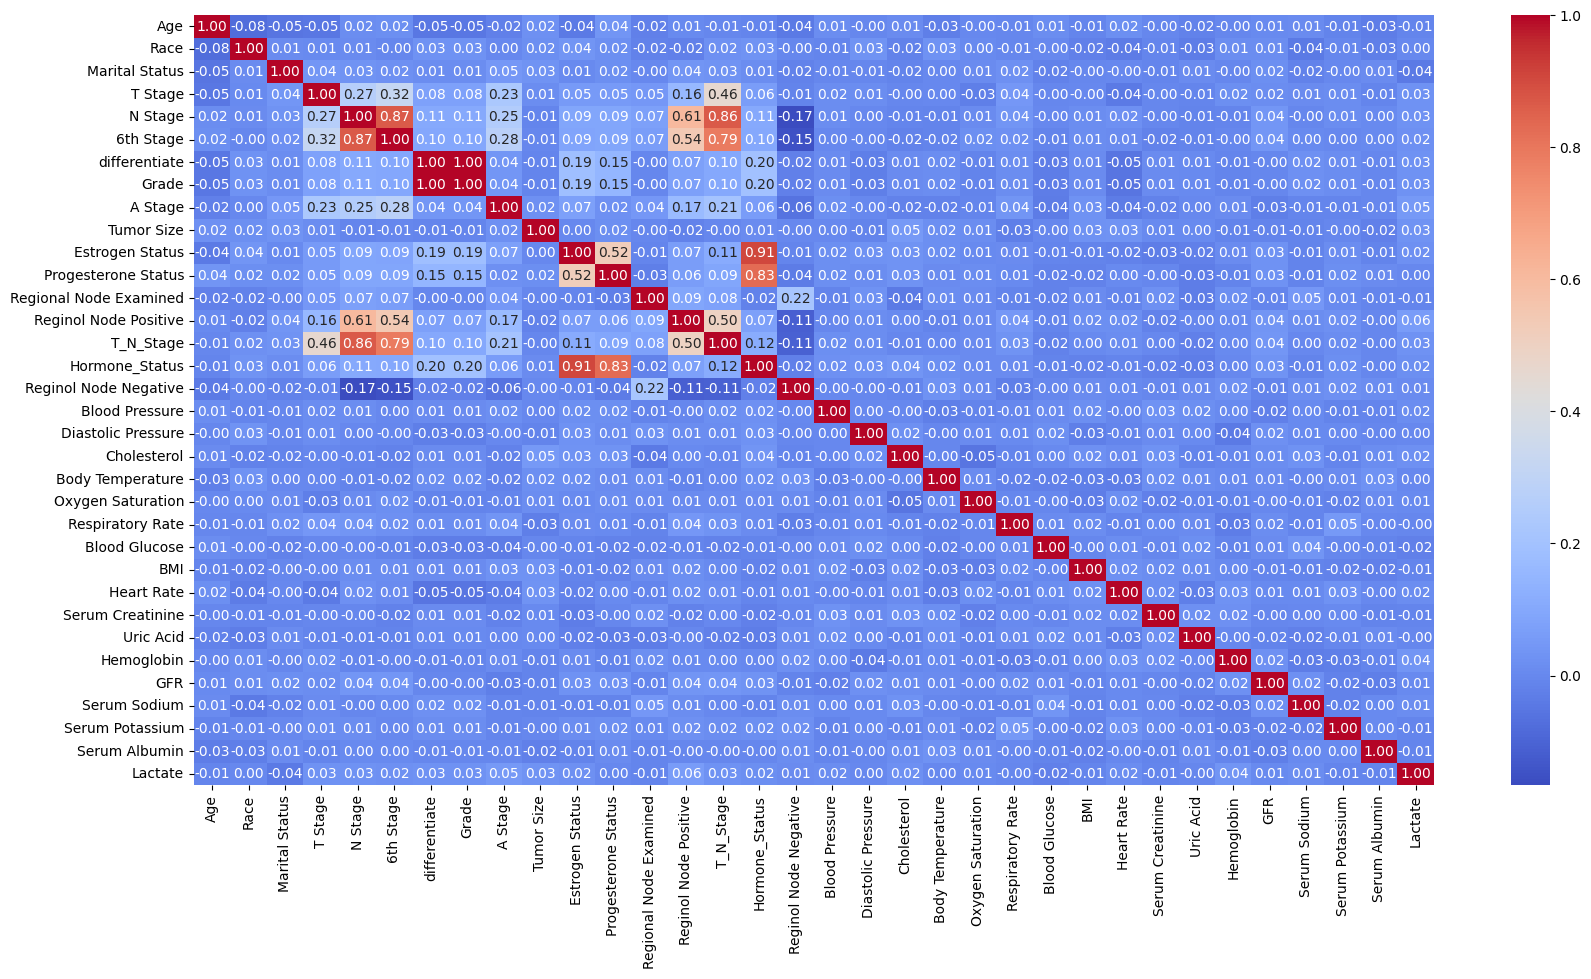

In [19]:
train_corr = X_train.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(train_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [20]:
upper = train_corr.abs().where(np.triu(np.ones(train_corr.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
to_drop

['6th Stage', 'Grade', 'T_N_Stage', 'Hormone_Status']

In [21]:
X_train = X_train.drop(to_drop, axis=1)
X_test = X_test.drop(to_drop, axis=1)

In [22]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
preds = rf_clf.predict(X_test)

In [24]:
subtask5_rows = []
for id_, pred in zip(df_test["ID"], preds):
    subtask5_rows.append((5, id_, pred))

## Save answers

In [25]:
submission_rows = subtask1_rows + subtask2_rows + subtask3_rows + subtask4_rows + subtask5_rows
df_submission = pd.DataFrame(submission_rows, columns=["subtaskID", "datapointID", "answer"])
df_submission.to_csv("submission.csv", index=False)

## Submission results

Subtask 1:
- Equal: 805
- Score: 10/10

Subtask 2:
- Equal: 805
- Score: 10/10

Subtask 3:
- Equal: 805
- Score: 10/10

Subtask 4:
- Equal: 805
- Score: 10/10

Subtask 5:
- Accuracy: 1
- Score: 60/60